
# Exploratory data analysis


## Table of contents

0. [Introduction](#Introduction)
1. [Import of packages](#Packages)
2. [Import of data](#Data)
    1. [Saving of the data](#Parquet)
3. [Functions definitions](#Functions)
    1. [Overview](#Overview)
4. [Exploratory Data Analysis Results](#EDAResults)
    1. [Overview](#OverviewResults)


<section id="Introduction">
    <h2> 0. Introduction </h2>
</section>


This is a file with functions that aim to facilitate exploratory data analysis. As output, the functions provide graphs, metrics, and basic tables commonly used in the analysis process. Pay attention to the function parameters:

- **df_origin**: single pandas dataframe;

<br>

- **X_train**: pandas train dataframe;
- **X_test**: pandas test dataframe;
- **X_validation**: pandas validation dataframe;

<br>

- **y_train**: train target;
- **y_test**: test target;
- **y_validation**: validation target;


---



<section id="Packages">
    <h2> 1. Import of packages </h2>
</section>


In [7]:
#!pip install

In [8]:
from sklearn.datasets import load_breast_cancer

from fast_ml import eda
from fast_ml.model_development import train_valid_test_split
from fast_ml.utilities import reduce_memory_usage, display_all

import pandas as pd
import pickle # pickle
import pyarrow

# interative interface
import ipywidgets as widgets
from IPython.display import display


<section id="Data">
    <h2> 2. Import of data </h2>
</section>


In [11]:
X_origin, y_origin = load_breast_cancer(return_X_y=True, as_frame=True)

In [12]:
y_dataframe = pd.DataFrame(y_origin, columns=['target'])

In [13]:
df_origin = pd.concat([X_origin, y_dataframe], axis=1)

In [14]:
df_origin

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [15]:
X_train, y_train, X_validation, y_validation, X_test, y_test = train_valid_test_split(df_origin,
                                                        target = 'target',
                                                        train_size=0.8,
                                                        valid_size=0.1,
                                                        test_size=0.1)


<section id="Parquet">
    <h3> 2. Saving of the data </h3>
</section>


In [17]:
X_train.to_parquet('X_train.parquet', index=False)
X_test.to_parquet('X_test.parquet', index=False)
X_validation.to_parquet('X_validation.parquet', index=False)

In [18]:
y_train = pd.DataFrame(y_train)
y_train.to_parquet('y_train.parquet', index=False)

y_test = pd.DataFrame(y_test)
y_test.to_parquet('y_test.parquet', index=False)

y_validation = pd.DataFrame(y_validation)
y_validation.to_parquet('y_validation.parquet', index=False)


---



<section id="Functions">
    <h2> 3. Functions definitions </h2>
</section>



<section id="Overview">
    <h3> 3.1. Overview </h3>
</section>


In [22]:
 def eda_overview(df):
    summary_df = eda.df_info(df)
    display_all(summary_df)


<section id="ProportionFunction">
    <h3> 3.2. Target Proportion </h3>
</section>


In [45]:
def plot_target_distribution_pie(original_series, train_series, test_series, validation_series):
    labels = ['Class 0', 'Class 1']  # Defina os rótulos apropriados para suas classes
    
    # Crie subplots para os quatro gráficos de pizza
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle('Target Distribution Comparison', fontsize=16)
    axes = axes.flatten()

    series_data = [original_series, train_series, test_series, validation_series]
    titles = ['Original Series', 'Train Series', 'Test Series', 'Validation Series']
    
    for ax, data, title in zip(axes, series_data, titles):
        class_counts = [len(data[data == 0]), len(data[data == 1])]  # Calcule a contagem de classes 0 e 1
        
        wedges, texts, autotexts = ax.pie(class_counts, labels=labels, startangle=90, colors=['lightblue', 'yellow'],
                                          wedgeprops={'edgecolor': 'black'}, autopct='%1.1f%%')
        ax.axis('equal')  # Proporção igual para garantir que o gráfico de pizza seja um círculo
        ax.set_title(title)

        # Adicione o número absoluto das classes aos rótulos
        for autotext, count in zip(autotexts, class_counts):
            autotext.set(size=12, fontweight='bold')
            autotext.set_text(f'{count}\n({autotext.get_text()})')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



<section id="DistributionsFunction">
    <h3> 3.3. Variables distributions </h3>
</section>


In [53]:
def plot_histograms(dataframe1, dataframe2, n_start, n_end):

    variables = dataframe1.columns[n_start:n_end]
    
    num_variables = len(variables)
    num_cols = 2
    num_rows = (num_variables + 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))
    
    if num_rows == 1 and num_cols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for i, var in enumerate(variables):
        axes[i].hist(dataframe1[var], bins=20, color='skyblue', alpha=0.7, label='Dataframe 1')
        axes[i].hist(dataframe2[var], bins=20, color='orange', alpha=0.7, label='Dataframe 2')
        axes[i].set_title(var + " Histogram")
        axes[i].set_xlabel(var)
        axes[i].set_ylabel("Frequency")
        axes[i].legend()
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()




---



<section id="EDAResults">
    <h2> 4. Exploratory Data Analysis Results </h2>
</section>



<section id="OverviewgResults">
    <h3> 4.1. Overview </h3>
</section>


In [39]:
eda_overview(df_origin)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
mean radius,float64,Numerical,456,"[17.99, 20.57, 19.69, 11.42, 20.29, 12.45, 18....",0,0.0
mean texture,float64,Numerical,479,"[10.38, 17.77, 21.25, 20.38, 14.34, 15.7, 19.9...",0,0.0
mean perimeter,float64,Numerical,522,"[122.8, 132.9, 130.0, 77.58, 135.1, 82.57, 119...",0,0.0
mean area,float64,Numerical,539,"[1001.0, 1326.0, 1203.0, 386.1, 1297.0, 477.1,...",0,0.0
mean smoothness,float64,Numerical,474,"[0.1184, 0.08474, 0.1096, 0.1425, 0.1003, 0.12...",0,0.0
mean compactness,float64,Numerical,537,"[0.2776, 0.07864, 0.1599, 0.2839, 0.1328, 0.17...",0,0.0
mean concavity,float64,Numerical,537,"[0.3001, 0.0869, 0.1974, 0.2414, 0.198, 0.1578...",0,0.0
mean concave points,float64,Numerical,542,"[0.1471, 0.07017, 0.1279, 0.1052, 0.1043, 0.08...",0,0.0
mean symmetry,float64,Numerical,432,"[0.2419, 0.1812, 0.2069, 0.2597, 0.1809, 0.208...",0,0.0
mean fractal dimension,float64,Numerical,499,"[0.07871, 0.05667, 0.05999, 0.09744, 0.05883, ...",0,0.0



<section id="Proportion">
    <h3> 4.2. Target proportion </h3>
</section>


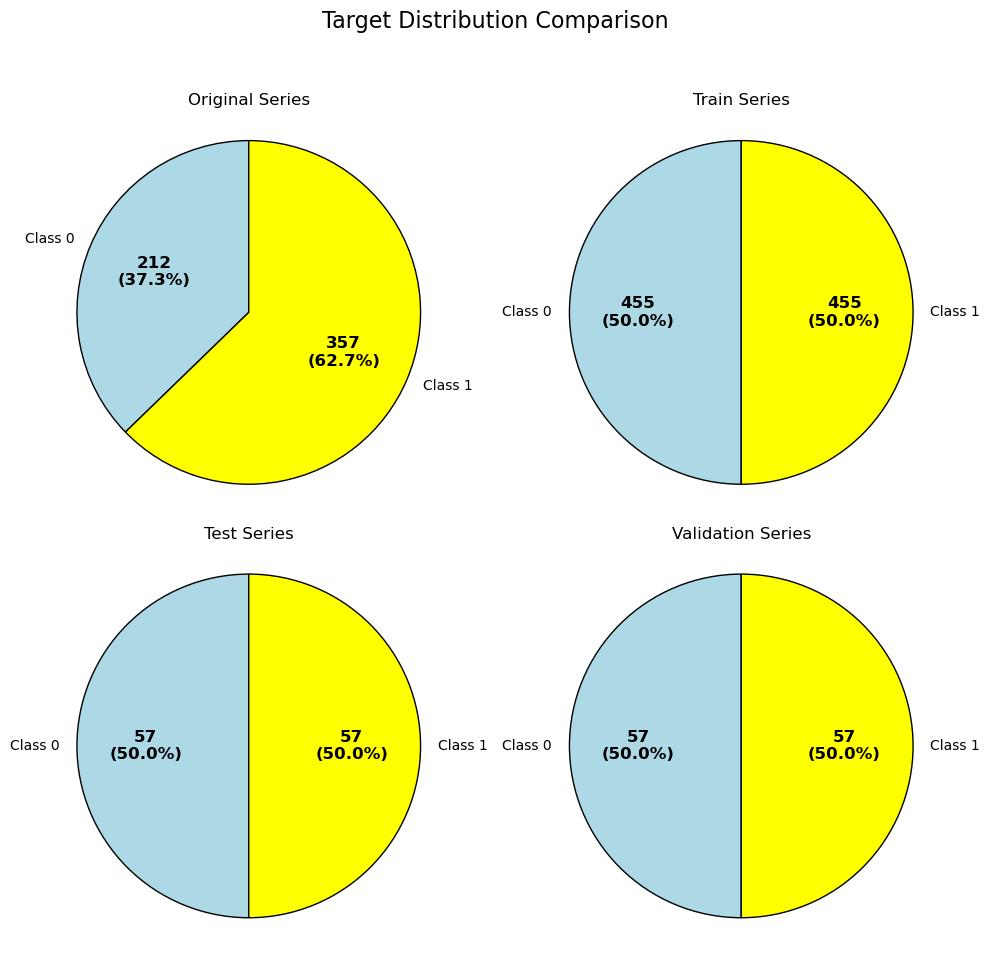

In [47]:
plot_target_distribution_pie(y_origin, y_train, y_test, y_validation)


<section id="Distribution">
    <h3> 4.3. Variables Distributions </h3>
</section>


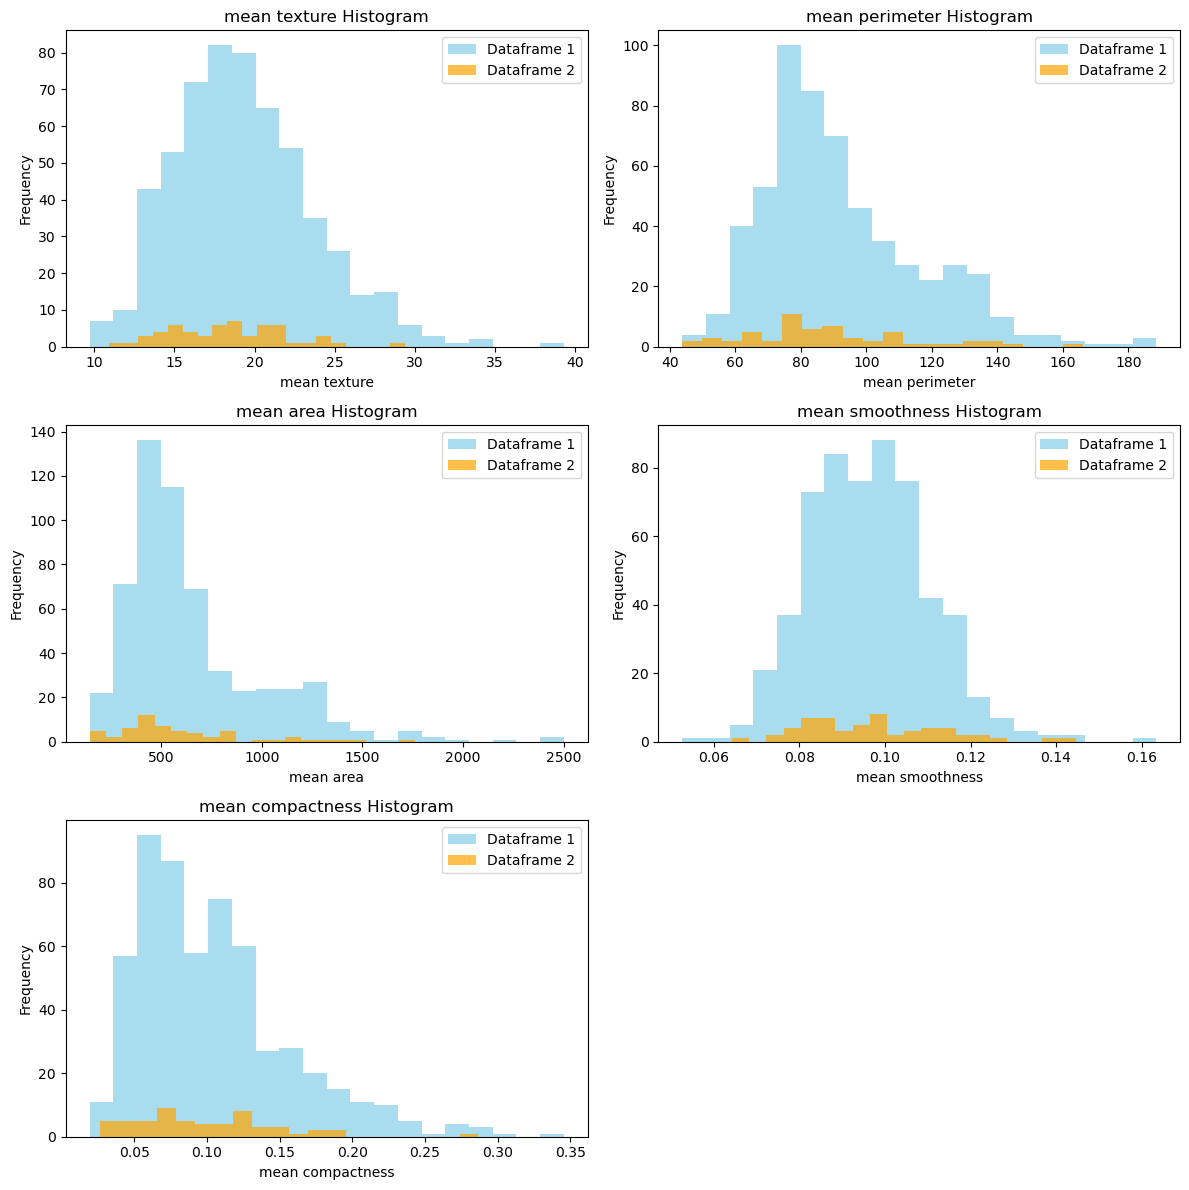

In [63]:
plot_histograms(df_origin, X_validation, 1, 6)